In [3]:
!pip list


Package                       Version
----------------------------- ----------------------------
absl-py                       1.2.0
aiohttp                       3.8.1
aiosignal                     1.2.0
alabaster                     0.7.12
albumentations                1.2.1
altair                        4.2.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arviz                         0.12.1
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
async-timeout                 4.0.2
asynctest                     0.13.0
atari-py                      0.2.9
atomicwrites                  1.4.1
attrs                         22.1.0
audioread                     2.1.9
autograd                      1.4
Babel                         2.10.3
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        5.0.1
blis                          0.7.

In [1]:
import os
import pandas as pd 
import tensorflow as tf
import numpy as np


In [2]:
df = pd.read_csv("/content/data/train.csv")

In [3]:
df.head()


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
df.iloc[0]["text"]

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'

In [5]:
from tensorflow.keras.layers import TextVectorization

In [6]:
df.columns

Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')

In [7]:
X = df[["text"]]
y = df["target"]

In [8]:
X.head()


,text
0,Our Deeds are the Reason of this #earthquake M...
1,Forest fire near La Ronge Sask. Canada
2,All residents asked to 'shelter in place' are ...
3,"13,000 people receive #wildfires evacuation or..."
4,Just got sent this photo from Ruby #Alaska as ...


In [9]:
print(y.head())

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64


In [10]:
MAX_FEATURES = 200000

In [11]:
vectorizer = TextVectorization(max_tokens = MAX_FEATURES,output_sequence_length=1800,
                               output_mode = 'int')

In [12]:
print(X.values)

[['Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all']
 ['Forest fire near La Ronge Sask. Canada']
 ["All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected"]
 ...
 ['M1.94 [01:04 UTC]?5km S of Volcano Hawaii. http://t.co/zDtoyd8EbJ']
 ['Police investigating after an e-bike collided with a car in Little Portugal. E-bike rider suffered serious non-life threatening injuries.']
 ['The Latest: More Homes Razed by Northern California Wildfire - ABC News http://t.co/YmY4rSkQ3d']]


In [13]:
X = X.replace(np.nan, '', regex=True)

In [14]:
X.values

array([['Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'],
       ['Forest fire near La Ronge Sask. Canada'],
       ["All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected"],
       ...,
       ['M1.94 [01:04 UTC]?5km S of Volcano Hawaii. http://t.co/zDtoyd8EbJ'],
       ['Police investigating after an e-bike collided with a car in Little Portugal. E-bike rider suffered serious non-life threatening injuries.'],
       ['The Latest: More Homes Razed by Northern California Wildfire - ABC News http://t.co/YmY4rSkQ3d']],
      dtype=object)

In [15]:
vectorizer.adapt(X.values)

In [16]:
vectorizer.get_vocabulary()

['',
 '[UNK]',
 'the',
 'a',
 'in',
 'to',
 'of',
 'and',
 'i',
 'is',
 'for',
 'on',
 'you',
 'my',
 'with',
 'it',
 'that',
 'at',
 'by',
 'this',
 'from',
 'be',
 'are',
 'was',
 'have',
 'like',
 'as',
 'me',
 'up',
 'just',
 'but',
 'so',
 'im',
 'amp',
 'not',
 'your',
 'out',
 'its',
 'after',
 'will',
 'all',
 'no',
 'fire',
 'an',
 'has',
 'when',
 'if',
 'we',
 'get',
 'new',
 'now',
 'via',
 'more',
 'about',
 'or',
 'what',
 'people',
 'one',
 'news',
 'he',
 'they',
 'how',
 'dont',
 'been',
 'over',
 'who',
 'into',
 'do',
 'were',
 'video',
 'us',
 'can',
 '2',
 'emergency',
 'disaster',
 'there',
 'police',
 'than',
 'her',
 'would',
 'still',
 'some',
 'his',
 'body',
 'burning',
 'crash',
 'back',
 'storm',
 'california',
 'suicide',
 'why',
 'them',
 'off',
 'time',
 'know',
 'got',
 'had',
 'man',
 'buildings',
 'day',
 'rt',
 'first',
 'see',
 'world',
 'going',
 'bomb',
 'cant',
 'nuclear',
 'love',
 'fires',
 'our',
 'attack',
 'youtube',
 'two',
 '3',
 'killed',

In [17]:
vectorized_text = vectorizer(X.values)

In [18]:
vectorized_text

<tf.Tensor: shape=(7613, 1800), dtype=int64, numpy=
array([[ 110, 6241,   22, ...,    0,    0,    0],
       [ 180,   42,  222, ...,    0,    0,    0],
       [  40, 1739, 1685, ...,    0,    0,    0],
       ...,
       [3124, 4515, 4656, ...,    0,    0,    0],
       [  76, 1096,   38, ...,    0,    0,    0],
       [   2,  199,   52, ...,    0,    0,    0]])>

In [19]:
len(vectorized_text)

7613

In [20]:
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text,y))
dataset = dataset.cache()
dataset = dataset.shuffle(8000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8)

In [21]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [23]:
model = Sequential()
model.add(Embedding(MAX_FEATURES+1,32))
model.add(Bidirectional(LSTM(32,activation='tanh')))
model.add(Dense(128,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))



In [24]:
model.compile(loss='BinaryCrossentropy', optimizer='Adam')

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400032   
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                        

In [28]:

history = model.fit(train,epochs=10,validation_data = val)

Epoch 1/10
333/333 [==============================] - 35s 104ms/step - loss: 0.3272 - val_loss: 0.2370
Epoch 2/10
333/333 [==============================] - 33s 99ms/step - loss: 0.2153 - val_loss: 0.1419
Epoch 3/10
333/333 [==============================] - 34s 101ms/step - loss: 0.1575 - val_loss: 0.0972
Epoch 4/10
333/333 [==============================] - 33s 100ms/step - loss: 0.1034 - val_loss: 0.0670
Epoch 5/10
333/333 [==============================] - 33s 99ms/step - loss: 0.0737 - val_loss: 0.0399
Epoch 6/10
333/333 [==============================] - 33s 99ms/step - loss: 0.0435 - val_loss: 0.0324
Epoch 7/10
333/333 [==============================] - 34s 101ms/step - loss: 0.0387 - val_loss: 0.0363
Epoch 8/10
333/333 [==============================] - 33s 98ms/step - loss: 0.0343 - val_loss: 0.0234
Epoch 9/10
333/333 [==============================] - 34s 101ms/step - loss: 0.0301 - val_loss: 0.0201
Epoch 10/10
333/333 [==============================] - 33s 98ms/step - loss: 

In [27]:
from matplotlib import pyplot as plt

<Figure size 576x360 with 0 Axes>

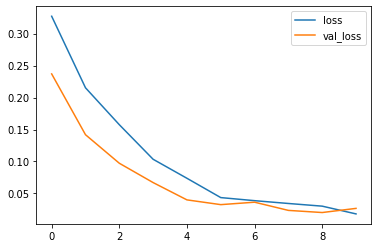

In [29]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

In [64]:
text = vectorizer("australia is hit by wild fire forests are burning")

In [65]:
batch = test.as_numpy_iterator().next()

In [66]:
model.predict(np.expand_dims(text,0))

array([[0.60821235]], dtype=float32)

[[0.00143175]]


In [36]:
text

<tf.Tensor: shape=(1800,), dtype=int64, numpy=array([15,  9,  3, ...,  0,  0,  0])>